In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('emotions.txt', sep=';', header=None)

In [3]:
df.columns = ['text', 'emotion']

In [4]:
df.shape

(10073, 2)

In [5]:
df.tail()

,text,emotion
10068,i feel like this author is a little underrated...,joy
10069,i stopped looking for a solution to my problem...,anger
10070,i was feeling very passionate and connected to...,joy
10071,i have a feeling i will be making a few more a...,joy
10072,i am,NaN


In [6]:
df.emotion.unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise', nan],
      dtype=object)

In [7]:
df.emotion.value_counts()

,count
emotion,
joy,3421
sadness,2896
anger,1375
fear,1164
love,826
surprise,390


In [8]:
e2i = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5}
i2e = {0:'joy', 1:'sadness', 2:'anger', 3:'fear', 4:'love', 5:'surprise'}

df['emotion_txt'] = df['emotion']
df['emotion'] = df['emotion'].replace(e2i)

<ipython-input-8-b4961e9f13fe>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emotion'] = df['emotion'].replace(e2i)


In [9]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

,0
text,0
emotion,0
emotion_txt,0


## Emotion detection

In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=42)

In [ ]:
# building a structured representation

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report ,ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

def check_scores(clf, X_train, X_test, y_train, y_test):

    model=clf.fit(X_train, y_train)
    predicted_class=model.predict(X_test)
    predicted_class_train=model.predict(X_train)
    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:, 1]

    class_names = ['joy', 'sadness','anger','fear','love','surprise']
    plt.figure(figsize=(10,10))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predicted_class_train),display_labels=class_names)
    disp.plot()
    plt.xticks(rotation=90)
    plt.title("Train Confusion Matrix")
    plt.show()


    plt.figure(figsize=(10,10))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_class),display_labels=class_names)
    disp.plot()
    plt.xticks(rotation=90)
    plt.title("Test Confusion Matrix")
    plt.show()

    print()
    print(classification_report(y_test,predicted_class))
    print()
    train_accuracy = accuracy_score(y_train,predicted_class_train)
    test_accuracy = accuracy_score(y_test,predicted_class)

    print()
    print("Train f1: ", f1_score(y_train, predicted_class_train,average='weighted'))
    print("Test f1: ", f1_score(y_test, predicted_class,average='weighted'))
    print()
    print("Train accuracy score: ", train_accuracy)
    print("Test accuracy score: ",test_accuracy)

    return model

<Figure size 720x720 with 0 Axes>

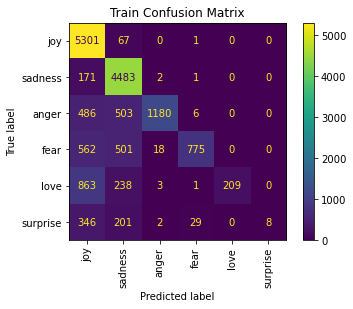

<Figure size 720x720 with 0 Axes>

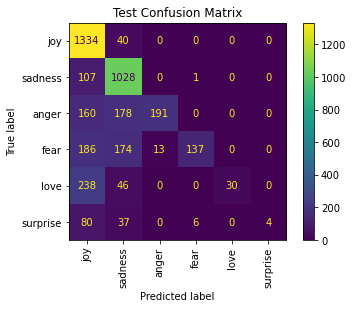


              precision    recall  f1-score   support

           0       0.63      0.97      0.77      1374
           1       0.68      0.90      0.78      1136
           2       0.94      0.36      0.52       529
           3       0.95      0.27      0.42       510
           4       1.00      0.10      0.17       314
           5       1.00      0.03      0.06       127

    accuracy                           0.68      3990
   macro avg       0.87      0.44      0.45      3990
weighted avg       0.77      0.68      0.62      3990



Train f1:  0.7043560230052831
Test f1:  0.6242155822209945

Train accuracy score:  0.7492636460487561
Test accuracy score:  0.6827067669172933


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb = check_scores(mnb, X_train_tfidf, X_test_tfidf, y_train, y_test)

<Figure size 720x720 with 0 Axes>

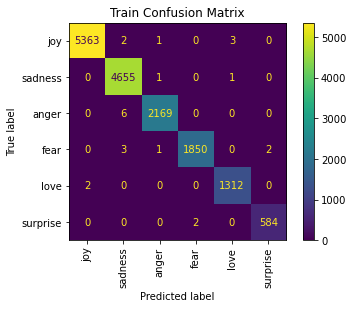

<Figure size 720x720 with 0 Axes>

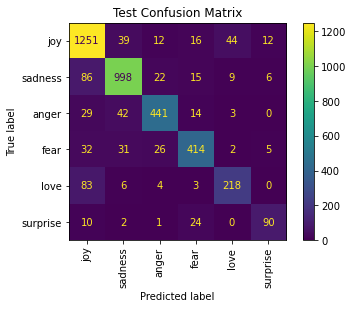


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1374
           1       0.89      0.88      0.89      1136
           2       0.87      0.83      0.85       529
           3       0.85      0.81      0.83       510
           4       0.79      0.69      0.74       314
           5       0.80      0.71      0.75       127

    accuracy                           0.86      3990
   macro avg       0.84      0.81      0.82      3990
weighted avg       0.86      0.86      0.85      3990



Train f1:  0.9984959356393904
Test f1:  0.8541224197684715

Train accuracy score:  0.9984959578868209
Test accuracy score:  0.8551378446115289


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)

rfc = check_scores(rfc, X_train_tfidf, X_test_tfidf, y_train, y_test)

import pickle
pickle.dump(rfc, open('rfc_model.pkl', 'wb'))

<Figure size 720x720 with 0 Axes>

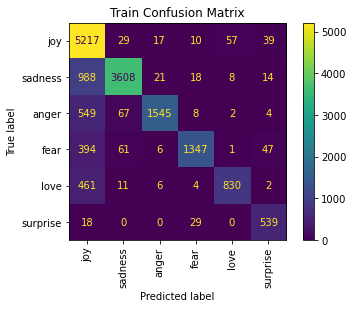

<Figure size 720x720 with 0 Axes>

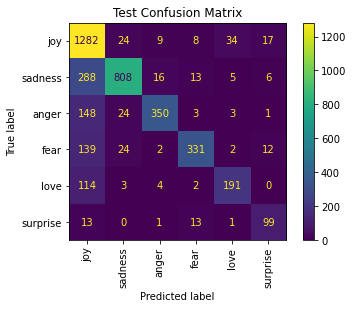


              precision    recall  f1-score   support

           0       0.65      0.93      0.76      1374
           1       0.92      0.71      0.80      1136
           2       0.92      0.66      0.77       529
           3       0.89      0.65      0.75       510
           4       0.81      0.61      0.69       314
           5       0.73      0.78      0.76       127

    accuracy                           0.77      3990
   macro avg       0.82      0.72      0.76      3990
weighted avg       0.81      0.77      0.77      3990



Train f1:  0.8213064987506685
Test f1:  0.7675607313289946

Train accuracy score:  0.8200789622109419
Test accuracy score:  0.7671679197994987


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc = check_scores(gbc, X_train_tfidf, X_test_tfidf, y_train, y_test)


### Predicting for new text:

In [ ]:
import pickle
rfc = pickle.load(open('rfc_model.pkl', 'rb'))

In [ ]:
string = 'happiness is a warm gun'
# note, text should go through the same cleaning procedure
transformed_text = tfidf.transform([string])
i2e[rfc.predict(transformed_text)[0]]

'anger'

In [ ]:
string = 'stop crying your heart out'
# note, text should go through the same cleaning procedure
transformed_text = tfidf.transform([string])
i2e[rfc.predict(transformed_text)[0]]

'fear'

## Are we missing something?

![OOD](img.png)

### Emotions vs sentiments

In [ ]:
from textblob import TextBlob

pol_tb = lambda x: TextBlob(x).sentiment.polarity
sub_tb = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity_tb'] = df['text'].apply(pol_tb)
df['subjectivity_tb'] = df['text'].apply(sub_tb)

emotion_averages = df.groupby('emotion_txt')[['polarity_tb', 'subjectivity_tb']].mean().reset_index()

In [ ]:
emotion_averages

,emotion_txt,polarity_tb,subjectivity_tb
0,anger,-0.100165,0.478725
1,fear,-0.059723,0.461128
2,joy,0.250720,0.552062
3,love,0.171699,0.572435
4,sadness,-0.107594,0.490592
5,surprise,0.044648,0.610824


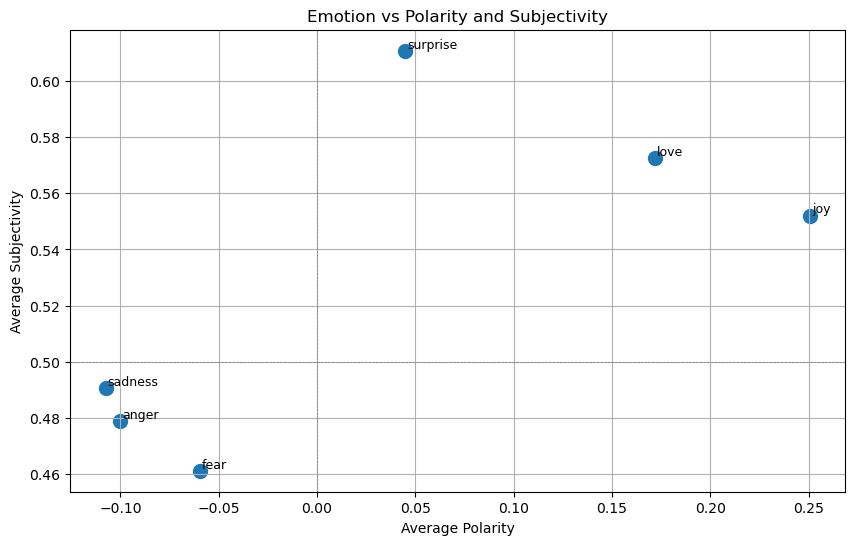

In [ ]:
import matplotlib.pyplot as plt

# Assuming emotion_averages is already created as before
# and has columns: 'emotion', 'polarity', 'subjectivity'

plt.figure(figsize=(10, 6))
plt.scatter(emotion_averages['polarity_tb'], emotion_averages['subjectivity_tb'], s=100)

# Annotate each point with the emotion label
for i, row in emotion_averages.iterrows():
    plt.text(row['polarity_tb'] + 0.001, row['subjectivity_tb'] + 0.001, row['emotion_txt'], fontsize=9)

plt.title('Emotion vs Polarity and Subjectivity')
plt.xlabel('Average Polarity')
plt.ylabel('Average Subjectivity')
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0.0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


### Why are people angry?

In [17]:
df_anger = df[df['emotion_txt'] == 'anger']

In [12]:
!pip install bertopic

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manyl

In [19]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_anger['text'])



In [21]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,334,-1_to_the_and_my,"[to, the, and, my, was, of, it, feel, in, feel...",[i wanted to say something to her but it was j...
1,0,73,0_angry_mad_pissed_so,"[angry, mad, pissed, so, feel, about, off, sad...","[i feel so pissed about myself, i do feel angr..."
2,1,60,1_offended_insulted_you_as,"[offended, insulted, you, as, that, feel, not,...",[i think feeling insulted was a good thing may...
3,2,46,2_dissatisfied_with_buy_feeling,"[dissatisfied, with, buy, feeling, and, myself...","[i still feel dissatisfied, i feel very dissat..."
4,3,43,3_irritable_irritated_feeling_and,"[irritable, irritated, feeling, and, im, latel...","[im feeling slightly irritable today, im feeli..."
5,4,41,4_jealous_envious_of_feeling,"[jealous, envious, of, feeling, their, can, to...","[i feel jealous with them why they can, i can ..."
6,5,41,5_rude_me_that_its,"[rude, me, that, its, hostile, to, people, lik...",[i feel that they are just saying these things...
7,6,39,6_distracted_need_to_get,"[distracted, need, to, get, like, waiting, day...",[i know there are days in which you feel distr...
8,7,39,7_hated_hateful_feel_despised,"[hated, hateful, feel, despised, like, that, a...","[i feel hated by my parents, i hated that i hu..."
9,8,35,8_selfish_for_feel_being,"[selfish, for, feel, being, myself, in, alone,...",[i feel selfish but i think it s about time i ...


What if we have more than 6 emotions?

In [22]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['text'])

In [24]:
topic_model.get_topic_info().to_csv("topic_emotions.csv")